# Assignment 1

Consider the function $-sin(\pi x)$ in the region [-1, 1]. Sample this
function at equal spaced intervals and perform an SPH approximation of the
exact function. Plot the L2 error in the approximation with respect to the
exact value as a function of the number of points used and the "h" value
chosen. Use both a cubic spline kernel and the Gaussian Kernels. The L2 norm
of a vector $y$ is $ |y| = \sqrt{\sum_i y_i^2}$.

Perform the same for the derivative of the function and compare with the exact
solution using the formula for the derivative.

Note, if $h = hdx * dx$, then make sure hdx is at least around 1. You may feel
free to experiment with values that are far from 1 and present those results.

Also note that you may have excessive errors near the edges of the domain i.e.
near $|x| = 1$. Please also show error plots for the interior points alone, i.e.
L2 error of the interior points.

Finally, pick one of the kernels and add a small amount of noise to the
positions of the particles (by adding a small random displacement, uniformly
distributed), and see how this affects the accuracy.

Do the approximation using a summation density to find the density of points using some arbitrary mass/density and also do so while using a constant mass/density for the particles and comment on your results.


Write the code cleanly using functions and show plots of your results.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [2]:
def get_n(n=10):
    return n

In [3]:
def sample_points(xmin, xmax, n):
    x = np.linspace(xmin, xmax, n+3)
    dx = abs(x[1]-x[0]) 
    samples = [-np.sin(np.pi*t) for t in x]
    return samples[1:-1],x[1:-1], dx
#     return samples,x, dx

In [4]:
def sample_points_der(xmin, xmax, n):
    x = np.linspace(xmin, xmax, n+3)
    dx = abs(x[1]-x[0]) 
    samples = [-np.pi*np.cos(np.pi*t) for t in x]
    return samples[1:-1],x[1:-1], dx
#     return samples,x, dx

In [51]:
def sample_points_with_noise(xmin, xmax, n):
    x = np.linspace(xmin, xmax, n+3)
    dx = abs(x[1]-x[0]) 
    disturbance = (np.random.random(len(x))-0.5)*0.01
    x = x+disturbance
    samples = [-np.sin(np.pi*t) for t in x]
    return samples[1:-1],x[1:-1], dx

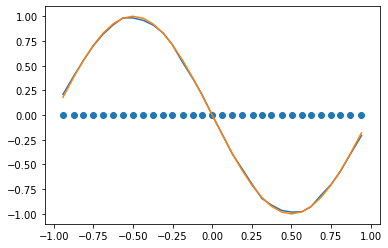

In [97]:
#L2 error on giving small random displacements 
n = 30
L2 = []
xmin, xmax = -1, 1

kernel = gaussian
samples,x, dx= sample_points_with_noise(xmin, xmax, n)
m = np.ones_like(samples)*dx
density = density_calc(m, kernel,x, dx)
# density = np.ones_like(x)
approx = sph_approx(samples, kernel, density, m, x)
#error = L2_error(approx, samples)
#L2.append(error)
    
plt.plot(x,approx)
plt.plot(x,-np.sin(np.pi*x))
plt.scatter(x,0*x)

In [6]:
def density_calc(m, kernel, x, dx):
    rho = []
    for i in range(len(m)):
        sums = 0
        for j in range(len(m)):
            xij = x[i]-x[j]
            Wij = kernel(xij,dx)
            sums+= Wij*m[j]
        rho.append(sums)
    return rho

In [7]:
def sph_approx(samples, kernel, rho, m, x):
    approx = []
    for i in range(len(samples)):
        sums = 0
        for j in range(len(samples)):
            xij = x[i]-x[j]
            Wij = kernel(xij, dx)
            sums+= samples[j]*Wij*m[j]/rho[j]
        approx.append(sums)
    return approx

In [8]:
def L2_error(approx, samples):
    diff = np.array(approx) - np.array(samples)
    diff2 = diff**2
    error = np.sqrt(diff2.sum())
    return error
    

In [9]:
def gaussian(xij,h):
    rij = abs(xij)
    q = rij/h
    if q <= 3:
        return np.exp(-q**2)/(h*np.sqrt(np.pi))
    elif q > 3:
        return 0
        

In [10]:
def gaussian_derivative(xij,h):
    rij = abs(xij)
    q = rij/h
    a = 1/(h*np.sqrt(np.pi))
    if q <= 3:
        if not xij==0:
            return a*np.exp(-q**2)*(-2*q/h)*(abs(xij)/xij)
        else: 
            return a*np.exp(-q**2)*(-2*q/h)
    elif q > 3:
        return 0

In [11]:
def cubic_spline_derivative(xij,h):
    rij = abs(xij)
    q = rij/h
    a = 2/(3*h)
    if q<=1:
        if not xij ==0 :
            return -1.5*a*((-(0.5*q**2)/h)+(2*q/h)*(1-0.5*q))*(abs(xij)/xij)
        else :
            return -1.5*a*((-(0.5*q**2)/h)+(2*q/h)*(1-0.5*q))
    elif q<=2:
        if not xij==0:
            return (-0.75*a/h*(2-q)**2)*(abs(xij)/xij)
        else:
            return (-0.75*a/h*(2-q)**2)
    elif q>2:
        return 0

In [12]:
def cubic_spline(xij,h):
    rij = abs(xij)
    q = rij/h
    a = 2/(3*h)
    if q<=1:
        return a*(1-(1.5*(q**2)*(1-0.5*q)))
    elif q<=2:
        return 0.25*a*(2-q)**3
    elif q>2:
        return 0

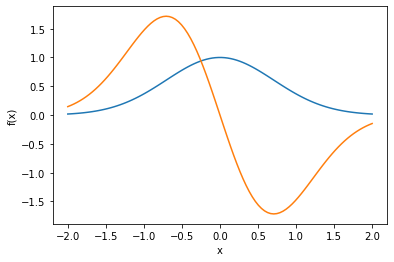

In [13]:
# Gaussian Kernel and its Derivative  
x = np.linspace(-2,2,100)
out, out_deri = [], [] 
for i in range(len(x)):
    out.append(gaussian(x[i],1))
    out_deri.append(gaussian_derivative(x[i],1))

out_p = np.array(out)*np.sqrt(np.pi)
out_pd = np.array(out_deri)*2*np.sqrt(np.pi)
plt.plot(x,out_p)
plt.plot(x,out_pd)
plt.xlabel("x");
plt.ylabel("f(x)");

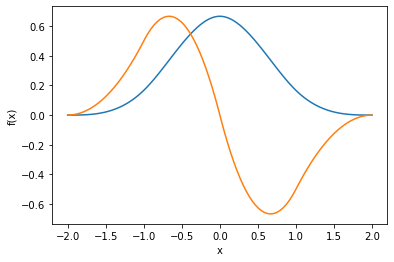

In [14]:
# Cubic Spline Kernel and its derivative 
x = np.linspace(-2,2,100)
out, out_deri = [], [] 
for i in range(len(x)):
    out.append(cubic_spline(x[i],1))
    out_deri.append(cubic_spline_derivative(x[i],1))

out_p = np.array(out)
out_pd = np.array(out_deri)
plt.plot(x,out_p)
plt.plot(x,out_pd)
plt.xlabel("x");
plt.ylabel("f(x)");

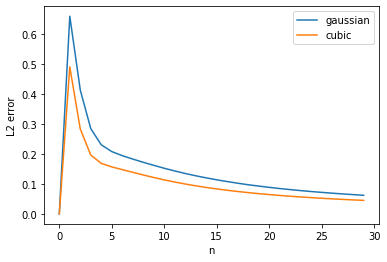

In [82]:
# L2 error for actual function  
n = 30
L2c, L2g = [], [], 
xmin, xmax = -1, 1

for l in range(n):
    samples,x, dx= sample_points(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, gaussian,x, dx)
#     density = m*dx
    approx = sph_approx(samples, gaussian, density, m, x)
    error = L2_error(approx, samples)
    L2g.append(error)
    
for l in range(n):
    kernel = cubic_spline
    samples,x, dx= sample_points(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, kernel,x, dx)
#     density = m*dx
    approx = sph_approx(samples, kernel, density, m, x)
    error = L2_error(approx, samples)
    L2c.append(error)
    
plt.plot(L2g, label="gaussian");
plt.plot(L2c, label="cubic");
plt.legend();
plt.xlabel("n");
plt.ylabel("L2 error");


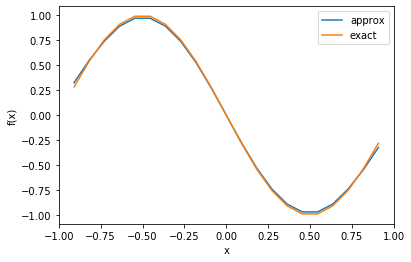

In [80]:
#Actual function v/s SPH function 
n = 20
xmin, xmax = -1, 1
samples,x, dx= sample_points(xmin, xmax, n)
m = np.ones_like(samples)*dx
density = density_calc(m, gaussian,x, dx)
approx = sph_approx(samples, gaussian, density, m, x)
plt.plot(x,approx,label="approx")
plt.plot(x,-np.sin(np.pi*x), label="exact")    
plt.legend()

plt.xlabel("x");
plt.ylabel("f(x)");

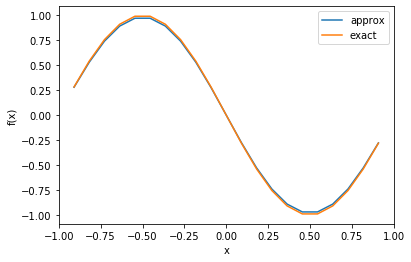

In [79]:
#Actual function v/s SPH function with constant denstity
n = 20
xmin, xmax = -1, 1
samples,x, dx= sample_points(xmin, xmax, n)
m = np.ones_like(samples)*dx
# density = density_calc(m, gaussian,x, dx)
density = np.ones_like(samples)
approx = sph_approx(samples, gaussian, density, m, x)
plt.plot(x,approx,label="approx")
plt.plot(x,-np.sin(np.pi*x), label="exact")    
plt.legend()

plt.xlabel("x");
plt.ylabel("f(x)");

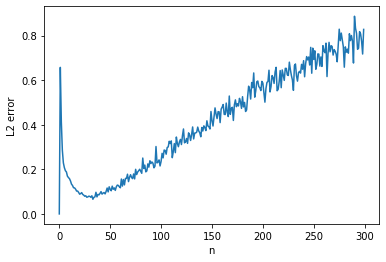

In [59]:
#L2 error on giving small random displacements 
n = 300
L2 = []
xmin, xmax = -1, 1

for l in range(n):
    kernel = gaussian
    samples,x, dx= sample_points_with_noise(xmin, xmax, l)
    m = np.ones_like(samples)
    density = density_calc(m, kernel,x, dx)
    approx = sph_approx(samples, kernel, density, m, x)
    error = L2_error(approx, samples)
    L2.append(error)
    
plt.plot(L2)
plt.xlabel("n");
plt.ylabel("L2 error");

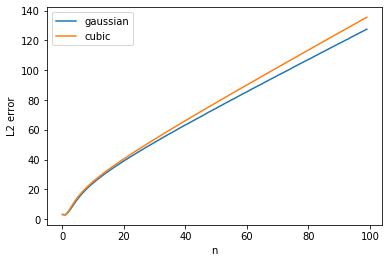

In [18]:
# L2 error of the derivative 
n = 100
L2c, L2g = [], [], 
xmin, xmax = -1, 1

for l in range(n):
    kernel = gaussian_derivative
    samples, x, dx= sample_points_der(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, gaussian,x, dx)
    approx = sph_approx(samples, kernel, density, m, x)
    error = L2_error(approx, samples)
    L2g.append(error)
 
for l in range(n):
    kernel = cubic_spline_derivative
    samples, x, dx= sample_points_der(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, cubic_spline,x, dx)
    approx = sph_approx(samples, kernel, density, m, x)
    error = L2_error(approx, samples)
    L2c.append(error)
    
plt.plot(L2g, label="gaussian");
plt.plot(L2c, label="cubic");
plt.legend()
plt.xlabel("n");
plt.ylabel("L2 error");


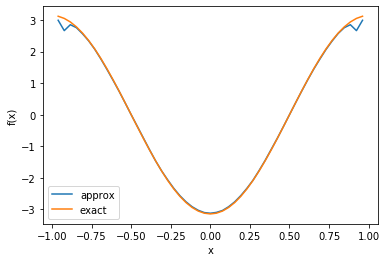

In [23]:
# Actual derivative vs SPH derivative 
n = 50
xmin, xmax = -1, 1
samples,x, dx= sample_points(xmin, xmax, n)
m = np.ones_like(samples)*dx
density = density_calc(m, gaussian,x, dx)
approx = sph_approx(samples, gaussian_derivative, density, m, x)
plt.plot(x,approx,label="approx")
plt.plot(x,-np.pi*np.cos(np.pi*x), label="exact")    
plt.legend()

plt.xlabel("x");
plt.ylabel("f(x)");

In [20]:
def density_calc_new(m, kernel, x_new, dx, x):
    rho = []
    for i in range(len(m)):
        sums = 0
        for j in range(len(x)):
            xij = x_new[i]-x[j]
            Wij = kernel(xij,dx)
            sums+= Wij*m[j]
        rho.append(sums)
    return rho

In [21]:
def sph_approx_new(samples, kernel, rho, m, x_new, x):
    approx_new = []
    for i in range(len(m)):
        sums = 0
        for j in range(len(samples)):
            xij = x_new[i]-x[j]
            Wij = kernel(xij, dx)
            sums+= samples[j]*Wij*m[j]/rho[j]
        approx_new.append(sums)
    return approx_new

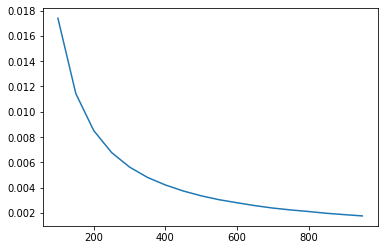

In [22]:
#     n = 100
L2c, L2g = [], [], 
xmin, xmax = -1, 1
a = range(100,1000,50)
for l in range(100,1000,50):

    kernel = gaussian
    samples,x, dx= sample_points(xmin, xmax, l)
    samples_new,x_new, dx_new = sample_points(xmin, xmax, 1000)
    m = np.ones_like(samples)*dx
    density = density_calc(m, gaussian,x, dx)
    approx = sph_approx(samples, kernel, density, m, x)

    m_new = np.ones_like(samples_new)*dx_new
    density_new = density_calc_new(m, gaussian,x_new, dx, x)
    approx_new = sph_approx_new(approx, kernel, density_new, m_new, x_new, x)

    error = L2_error(approx, samples)
    L2g.append(error)
    
plt.plot(a,L2g)

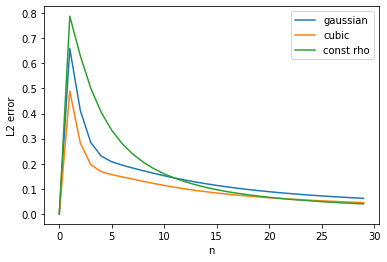

In [86]:
# L2 error for actual function  
n = 30
L2c, L2g,L2e = [], [], [] 
xmin, xmax = -1, 1

for l in range(n):
    samples,x, dx= sample_points(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, gaussian,x, dx)
#     density = m*dx
    approx = sph_approx(samples, gaussian, density, m, x)
    error = L2_error(approx, samples)
    L2g.append(error)
    

for l in range(n):
    samples,x, dx= sample_points(xmin, xmax, l)
    m = np.ones_like(samples)*dx
#     density = density_calc(m, gaussian,x, dx)
    density = np.ones_like(samples)
    approx = sph_approx(samples, gaussian, density, m, x)
    error = L2_error(approx, samples)
    L2e.append(error)
    
for l in range(n):
    kernel = cubic_spline
    samples,x, dx= sample_points(xmin, xmax, l)
    m = np.ones_like(samples)*dx
    density = density_calc(m, kernel,x, dx)
#     density = m*dx
    approx = sph_approx(samples, kernel, density, m, x)
    error = L2_error(approx, samples)
    L2c.append(error)
    
plt.plot(L2g, label="gaussian");
plt.plot(L2c, label="cubic");
plt.plot(L2e, label="const rho");

plt.legend();
plt.xlabel("n");
plt.ylabel("L2 error");
